In [32]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
x_1 = np.random.randn(100)
x_2 = 2 + 5*x_1 + np.random.normal(0,0.5,100)
y = 3-3*x_1 + np.random.normal(0,0.5,100)
X = np.concatenate((x_1.reshape(-1,1),x_2.reshape(-1,1)),axis = 1)
lin_reg = LinearRegression().fit(X,y)
lin_reg.score(X,y)

0.9801781771169621

In [3]:
x_1 = np.random.randn(100)
x_2 = 2 + 5*x_1 + np.random.normal(0,0.5,100)
y = 3-3*x_1 + np.random.normal(0,0.5,100)
# X = np.concatenate((x_1.reshape(-1,1)),axis = 1)
X = x_1.reshape(-1,1)
lin_reg = LinearRegression().fit(X,y)
lin_reg.score(X,y)

0.9739059151821357

In [27]:
X = np.random.randn(100,5)
df = pd.DataFrame(columns=[item for item in "abcde"],data=X)

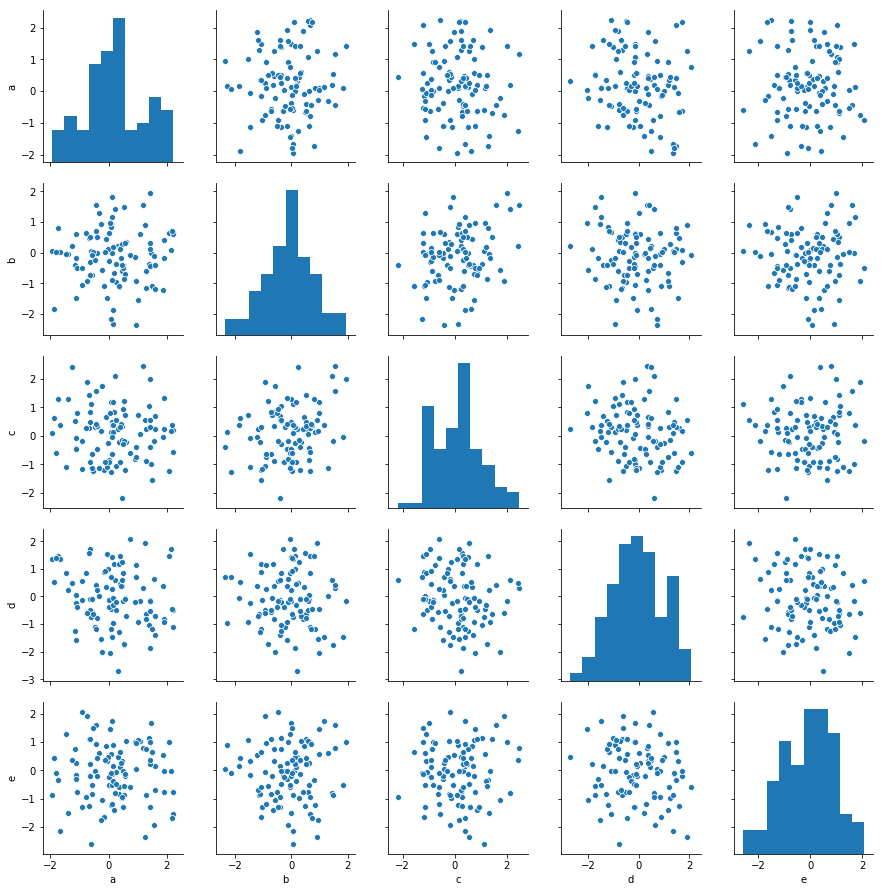

In [28]:
sns.pairplot(df);

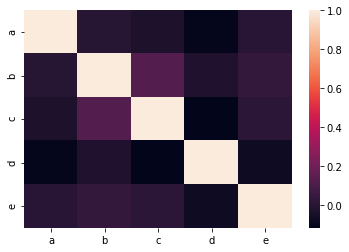

In [29]:
corr_mat = df.corr(method="kendall")
sns.heatmap(corr_mat)

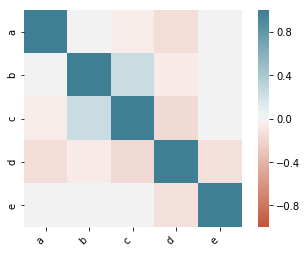

In [30]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

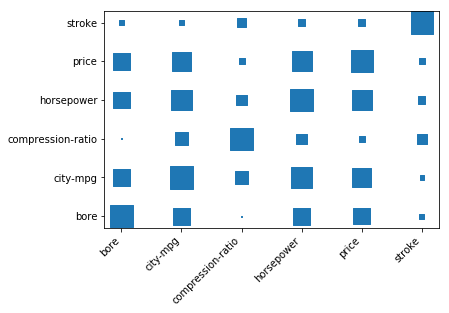

In [33]:
def heatmap(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    
data = pd.read_csv('https://raw.githubusercontent.com/drazenz/heatmap/master/autos.clean.csv')
columns = ['bore', 'stroke', 'compression-ratio', 'horsepower', 'city-mpg', 'price'] 
corr = data[columns].corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)